## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [16]:
# Basic Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv(r'D:\mlprojects\notebook\data\stud.csv')

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X anf Y variable

In [19]:
X = df.drop(columns='math_score',axis=1)

In [20]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [21]:
y=df['math_score']

In [22]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [24]:
print("ategories in 'gender'variable" ,end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable :   ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable :   ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable :   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable :   ",end=" ")
print(df['test_preparation_course'].unique())

ategories in 'gender'variable ['female' 'male']
Categories in 'race_ethnicity' variable :    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :    ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable :    ['none' 'completed']


In [25]:
# Create columns transformation with 3 type of transformation
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_feature),
        ('StandardScaler',numeric_transformer,num_feature)
    ]
)

In [26]:
X = preprocessor.fit_transform(X)

In [27]:
X.shape

(1000, 19)

In [31]:
# seperate dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [32]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [33]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [34]:
from catboost import CatBoostRegressor

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()

}
model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train model

    #Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("-Root Mean Squred: {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-Mean Absolute Error: {:.4f}".format(model_train_r2))

    print('-------------------------------------------')

    
    print('Model performance for Testing set')
    print("-Root Mean Squred: {:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-Mean Absolute Error: {:.4f}".format(model_test_r2))
    r2_list.append(model_train_r2)


    print('='*35)
    print('\n')


    


Linear Regression
Model performance for Training set
-Root Mean Squred: 5.3243
-Mean Absolute Error: 4.2671
-Mean Absolute Error: 0.8743
-------------------------------------------
Model performance for Testing set
-Root Mean Squred: 5.3960
-Mean Absolute Error: 4.2158
-Mean Absolute Error: 0.8803


Lasso
Model performance for Training set
-Root Mean Squred: 6.5938
-Mean Absolute Error: 5.2063
-Mean Absolute Error: 0.8071
-------------------------------------------
Model performance for Testing set
-Root Mean Squred: 6.5197
-Mean Absolute Error: 5.1579
-Mean Absolute Error: 0.8253


Ridge
Model performance for Training set
-Root Mean Squred: 5.3233
-Mean Absolute Error: 4.2650
-Mean Absolute Error: 0.8743
-------------------------------------------
Model performance for Testing set
-Root Mean Squred: 5.3904
-Mean Absolute Error: 4.2111
-Mean Absolute Error: 0.8806


K-Neighbors Regressor
Model performance for Training set
-Root Mean Squred: 5.7077
-Mean Absolute Error: 4.5167
-Mean Abs

### Result

In [38]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model name,R2_score
4,Decision Tree,0.999653
6,XGBRegressor,0.995500
5,Random Forest Regressor,0.976913
2,Ridge,0.874304
0,Linear Regression,0.874257
3,K-Neighbors Regressor,0.855498
7,AdaBoost Regressor,0.849297
1,Lasso,0.807146


## XGBRegressor

In [39]:
xgb_model = XGBRegressor(fit_intercept=True)
xgb_model = xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)


Accuracy of the model is 82.78


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

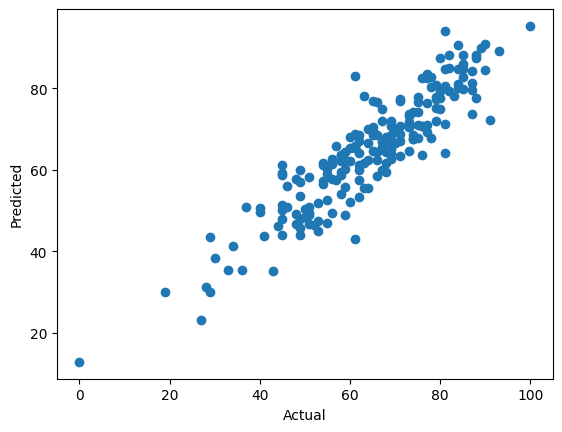

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

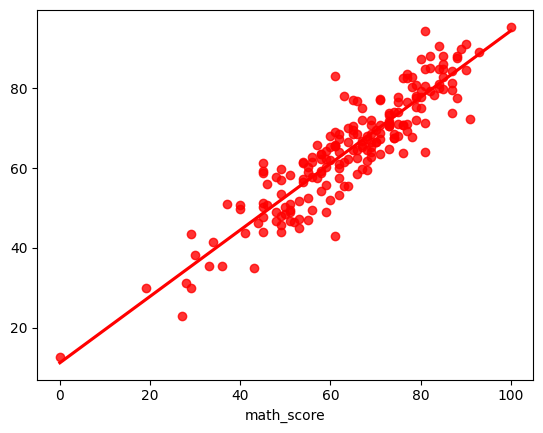

In [41]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

#### Difference between Actual and Predicted Values

In [42]:
pred_df = pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,72.256554,18.743446
737,53,51.827824,1.172176
740,80,79.382545,0.617455
660,74,74.103836,-0.103836
411,84,84.875084,-0.875084
...,...,...,...
408,52,46.441635,5.558365
332,62,60.034035,1.965965
208,74,67.617630,6.382370
613,65,69.601791,-4.601791
